In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
import torch
print(torch.cuda.is_available()) # True
print(torch.cuda.device_count()) # 1
print(torch.cuda.current_device()) # 0
print(torch.cuda.device(0)) # <torch.cuda.device at 0x7efce0b03be0>
print(torch.cuda.get_device_name(0)) # 'GeForce GTX 950M'

True
1
0
NVIDIA TITAN Xp


In [4]:
import sys
sys.path.append("../../..")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from librep.datasets.har.loaders import (
    KuHar_BalancedView20HzMotionSenseEquivalent
)

2022-11-29 09:09:42.955479: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-29 09:09:44.593257: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-29 09:09:44.593387: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-29 09:09:44.593402: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

In [7]:
from librep.transforms.topo_ae import (
    TopologicalDimensionalityReduction,
    CustomTopoDimRedTransform
)
from librep.transforms import UMAP
from sklearn.manifold import TSNE
from experiments.Topological_ae.Experiment_utils import *
from librep.datasets.multimodal import TransformMultiModalDataset
from librep.transforms.fft import FFT

In [8]:
loader = KuHar_BalancedView20HzMotionSenseEquivalent(
    root_dir="../../../data/views/KuHar/balanced_20Hz_motionsense_equivalent-v1", 
    download=False
)

In [9]:
# Load the dataset
train_val, test = loader.load(concat_train_validation=True, label=loader.standard_label)
train_val, test

(PandasMultiModalDataset: samples=3114, features=360, no. window=6, label_columns='standard activity code',
 PandasMultiModalDataset: samples=246, features=360, no. window=6, label_columns='standard activity code')

In [10]:
train_HD = np.array(train_val[:][0])
train_LD = None
train_Y = np.array(train_val[:][1])
test_HD = np.array(test[:][0])
test_LD = None
test_Y = np.array(test[:][1])

In [11]:
print(train_HD.shape, train_Y.shape, test_HD.shape, test_Y.shape)

(3114, 360) (3114,) (246, 360) (246,)


# Aplicar FFT

In [12]:
fft_transform = FFT(centered = True)
transformer = TransformMultiModalDataset(
    transforms=[fft_transform],
    new_window_name_prefix="fft."
)

In [13]:
train_dataset_fft = transformer(train_val)
test_dataset_fft = transformer(test)

In [14]:
print(train_dataset_fft.X.shape)
print(test_dataset_fft.X.shape)

(3114, 180)
(246, 180)


In [15]:
print(np.max(train_dataset_fft.X))

1199.4899017510002


In [16]:
train_HD = train_dataset_fft.X
train_LD = None
train_Y = train_dataset_fft.y
test_HD = test_dataset_fft.X
test_LD = None
test_Y = test_dataset_fft.y

In [17]:
print(train_HD.shape, train_Y.shape, test_HD.shape, test_Y.shape)

(3114, 180) (3114,) (246, 180) (246,)


Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:518.4301, Loss-ae:518.4301, Loss-topo:344.6480
Epoch:2, P:None, Loss:384.0809, Loss-ae:384.0809, Loss-topo:373.6595
Epoch:3, P:None, Loss:353.4665, Loss-ae:353.4665, Loss-topo:589.7836
Epoch:4, P:None, Loss:302.4412, Loss-ae:302.4412, Loss-topo:1244.1041
Epoch:5, P:None, Loss:250.2568, Loss-ae:250.2568, Loss-topo:2309.1498
Epoch:6, P:None, Loss:216.5144, Loss-ae:216.5144, Loss-topo:4394.0830
Epoch:7, P:None, Loss:195.9125, Loss-ae:195.9125, Loss-topo:6302.4719
Epoch:8, P:None, Loss:177.5561, Loss-ae:177.5561, Loss-topo:8882.8889
Epoch:9, P:None, Loss:163.0014, Loss-ae:163.0014, Loss-topo:11423.7104
Epoch:10, P:None, Loss:152.0599, Loss-ae:152.0599, Loss-topo:14002.4791
Epoch:11, P:None, Loss:141.9711, Loss-ae:141.9711, Loss-topo:16866.1070
Epoch:12, P:None, Loss:136.8779, Loss-ae:136.8779, Loss-topo:18476.5527
Epoch:13, P:None, Loss:132.9096, Loss-ae:132.9096, Loss-topo:20483.0150
Epoch:14, P:None, Loss:127.7316, Loss-ae:127.7316, Loss-topo:23095.4160
Epoch:15, P:

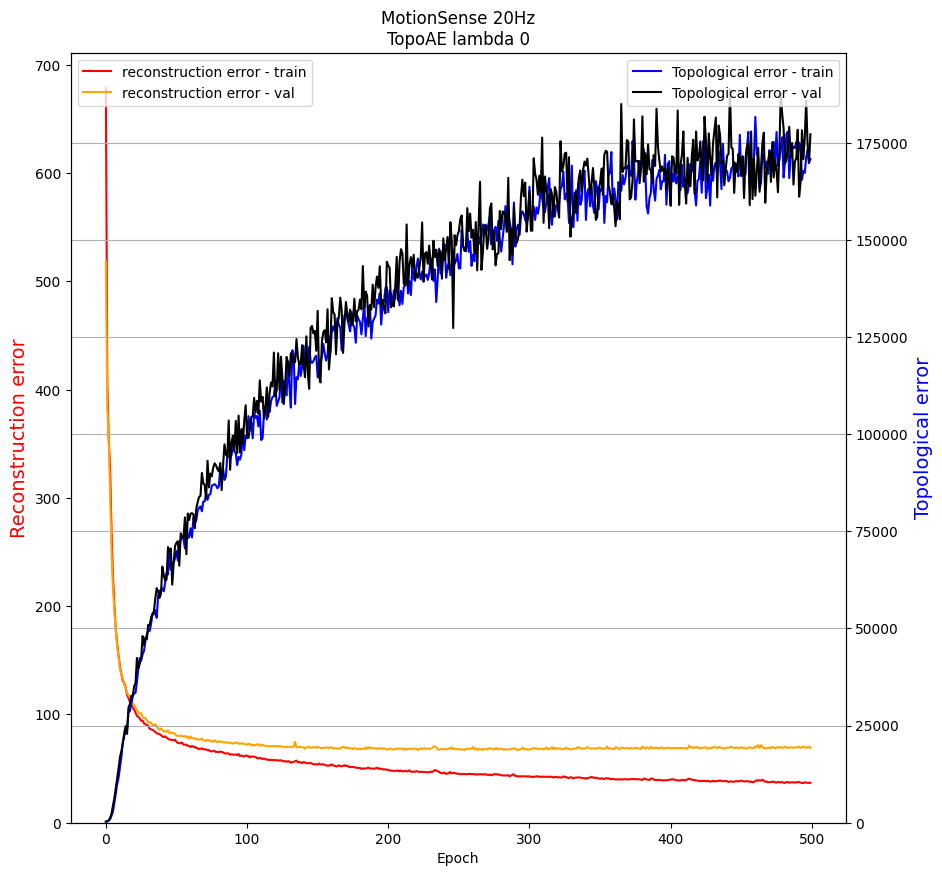

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:507.6196, Loss-ae:493.6209, Loss-topo:139.9870
Epoch:2, P:None, Loss:373.6883, Loss-ae:364.4830, Loss-topo:92.0525
Epoch:3, P:None, Loss:354.7664, Loss-ae:345.5141, Loss-topo:92.5231
Epoch:4, P:None, Loss:336.7739, Loss-ae:324.1311, Loss-topo:126.4273
Epoch:5, P:None, Loss:289.9407, Loss-ae:270.7876, Loss-topo:191.5313
Epoch:6, P:None, Loss:263.9162, Loss-ae:248.2789, Loss-topo:156.3728
Epoch:7, P:None, Loss:246.5926, Loss-ae:233.2910, Loss-topo:133.0160
Epoch:8, P:None, Loss:234.7853, Loss-ae:221.0942, Loss-topo:136.9106
Epoch:9, P:None, Loss:223.4650, Loss-ae:211.9540, Loss-topo:115.1097
Epoch:10, P:None, Loss:214.1706, Loss-ae:203.2834, Loss-topo:108.8728
Epoch:11, P:None, Loss:203.0777, Loss-ae:191.7795, Loss-topo:112.9820
Epoch:12, P:None, Loss:195.8629, Loss-ae:184.9249, Loss-topo:109.3797
Epoch:13, P:None, Loss:187.4760, Loss-ae:176.9381, Loss-topo:105.3795
Epoch:14, P:None, Loss:180.9903, Loss-ae:170.9638, Loss-topo:100.2645
Epoch:15, P:None, Loss:176.1442

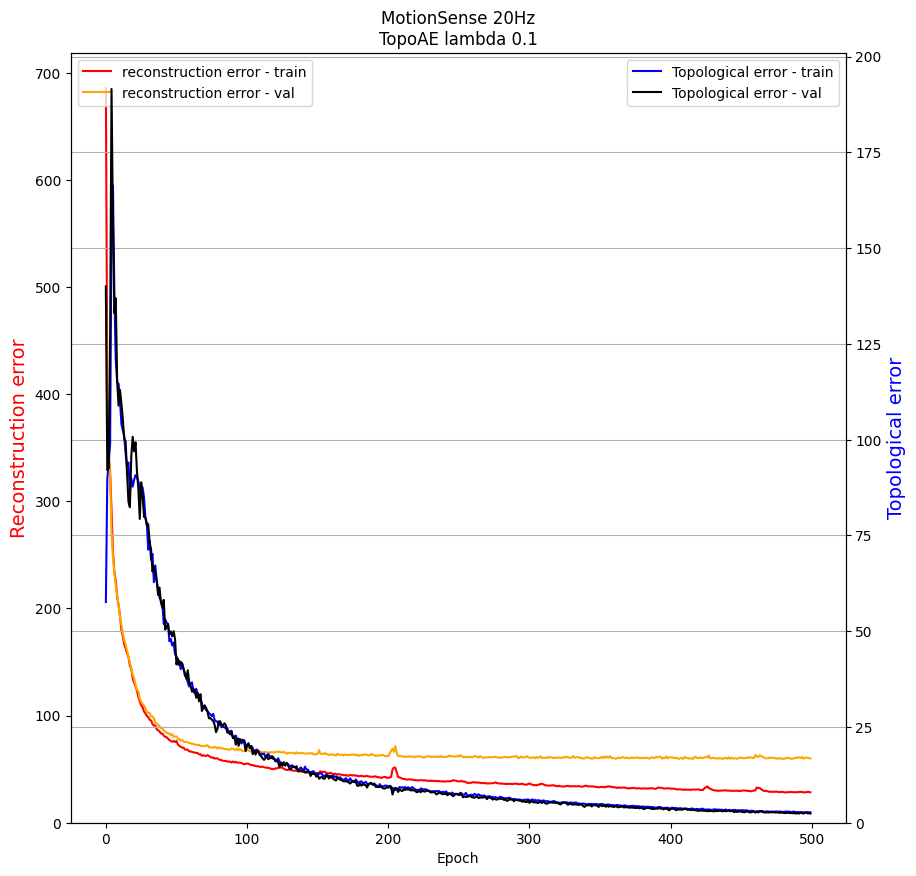

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:822.4040, Loss-ae:822.4039, Loss-topo:0.0086
Epoch:2, P:None, Loss:814.1398, Loss-ae:814.1398, Loss-topo:0.0008
Epoch:3, P:None, Loss:819.4301, Loss-ae:819.4301, Loss-topo:0.0003
Epoch:4, P:None, Loss:815.1891, Loss-ae:815.1891, Loss-topo:0.0006
Epoch:5, P:None, Loss:821.0672, Loss-ae:821.0672, Loss-topo:0.0006
Epoch:6, P:None, Loss:815.3467, Loss-ae:815.3467, Loss-topo:0.0004
Epoch:7, P:None, Loss:815.6158, Loss-ae:815.6158, Loss-topo:0.0004
Epoch:8, P:None, Loss:812.1547, Loss-ae:812.1547, Loss-topo:0.0006
Epoch:9, P:None, Loss:819.5998, Loss-ae:819.5998, Loss-topo:0.0007
Epoch:10, P:None, Loss:809.9001, Loss-ae:809.9001, Loss-topo:0.0007
Epoch:11, P:None, Loss:817.7230, Loss-ae:817.7230, Loss-topo:0.0005
Epoch:12, P:None, Loss:812.7202, Loss-ae:812.7202, Loss-topo:0.0004
Epoch:13, P:None, Loss:816.6665, Loss-ae:816.6665, Loss-topo:0.0004
Epoch:14, P:None, Loss:820.8665, Loss-ae:820.8665, Loss-topo:0.0005
Epoch:15, P:None, Loss:822.1328, Loss-ae:822.1328, Loss-t

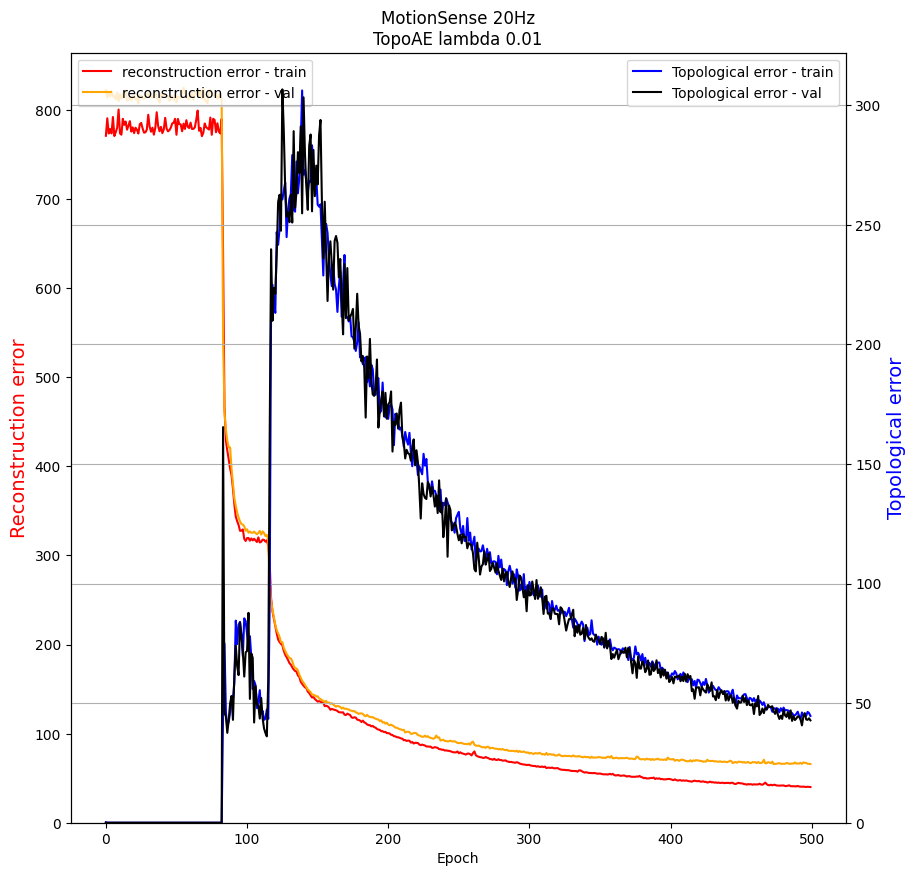

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:595.6272, Loss-ae:553.5371, Loss-topo:42.0901
Epoch:2, P:None, Loss:411.0432, Loss-ae:397.6109, Loss-topo:13.4324
Epoch:3, P:None, Loss:382.1672, Loss-ae:370.4564, Loss-topo:11.7108
Epoch:4, P:None, Loss:367.7726, Loss-ae:358.5375, Loss-topo:9.2350
Epoch:5, P:None, Loss:354.2935, Loss-ae:344.3233, Loss-topo:9.9701
Epoch:6, P:None, Loss:345.7619, Loss-ae:333.5979, Loss-topo:12.1640
Epoch:7, P:None, Loss:307.0811, Loss-ae:290.6477, Loss-topo:16.4334
Epoch:8, P:None, Loss:277.7834, Loss-ae:263.6463, Loss-topo:14.1370
Epoch:9, P:None, Loss:266.1454, Loss-ae:252.0965, Loss-topo:14.0489
Epoch:10, P:None, Loss:255.4653, Loss-ae:244.0463, Loss-topo:11.4190
Epoch:11, P:None, Loss:243.2820, Loss-ae:233.8480, Loss-topo:9.4341
Epoch:12, P:None, Loss:236.6419, Loss-ae:227.4838, Loss-topo:9.1581
Epoch:13, P:None, Loss:226.9770, Loss-ae:216.3612, Loss-topo:10.6158
Epoch:14, P:None, Loss:216.6167, Loss-ae:207.8216, Loss-topo:8.7951
Epoch:15, P:None, Loss:211.4199, Loss-ae:201.565

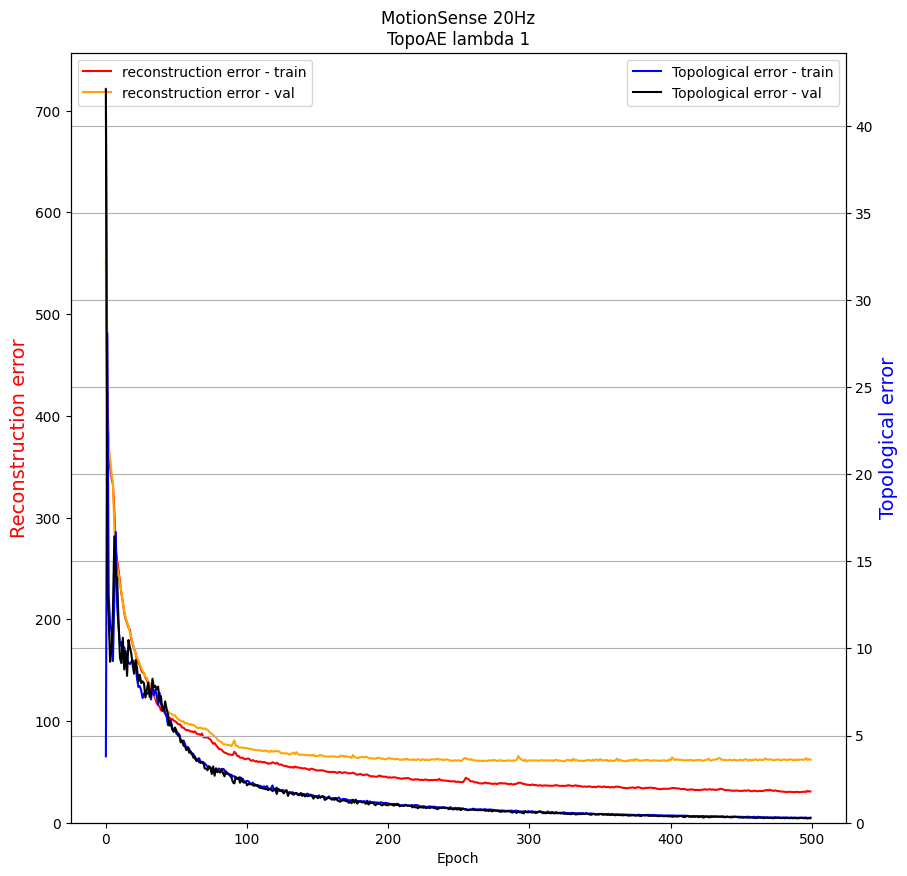

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:819.3440, Loss-ae:819.3181, Loss-topo:0.0026
Epoch:2, P:None, Loss:585.9396, Loss-ae:554.7704, Loss-topo:3.1169
Epoch:3, P:None, Loss:459.3616, Loss-ae:447.3133, Loss-topo:1.2048
Epoch:4, P:None, Loss:426.6223, Loss-ae:416.1597, Loss-topo:1.0463
Epoch:5, P:None, Loss:404.5037, Loss-ae:392.2431, Loss-topo:1.2261
Epoch:6, P:None, Loss:381.4547, Loss-ae:372.4724, Loss-topo:0.8982
Epoch:7, P:None, Loss:367.5854, Loss-ae:359.9394, Loss-topo:0.7646
Epoch:8, P:None, Loss:357.2523, Loss-ae:349.1972, Loss-topo:0.8055
Epoch:9, P:None, Loss:348.7085, Loss-ae:342.3942, Loss-topo:0.6314
Epoch:10, P:None, Loss:340.3545, Loss-ae:333.1093, Loss-topo:0.7245
Epoch:11, P:None, Loss:329.9875, Loss-ae:322.5145, Loss-topo:0.7473
Epoch:12, P:None, Loss:317.4957, Loss-ae:303.9698, Loss-topo:1.3526
Epoch:13, P:None, Loss:296.7201, Loss-ae:282.3685, Loss-topo:1.4352
Epoch:14, P:None, Loss:278.4379, Loss-ae:263.1261, Loss-topo:1.5312
Epoch:15, P:None, Loss:266.5430, Loss-ae:255.5042, Loss-t

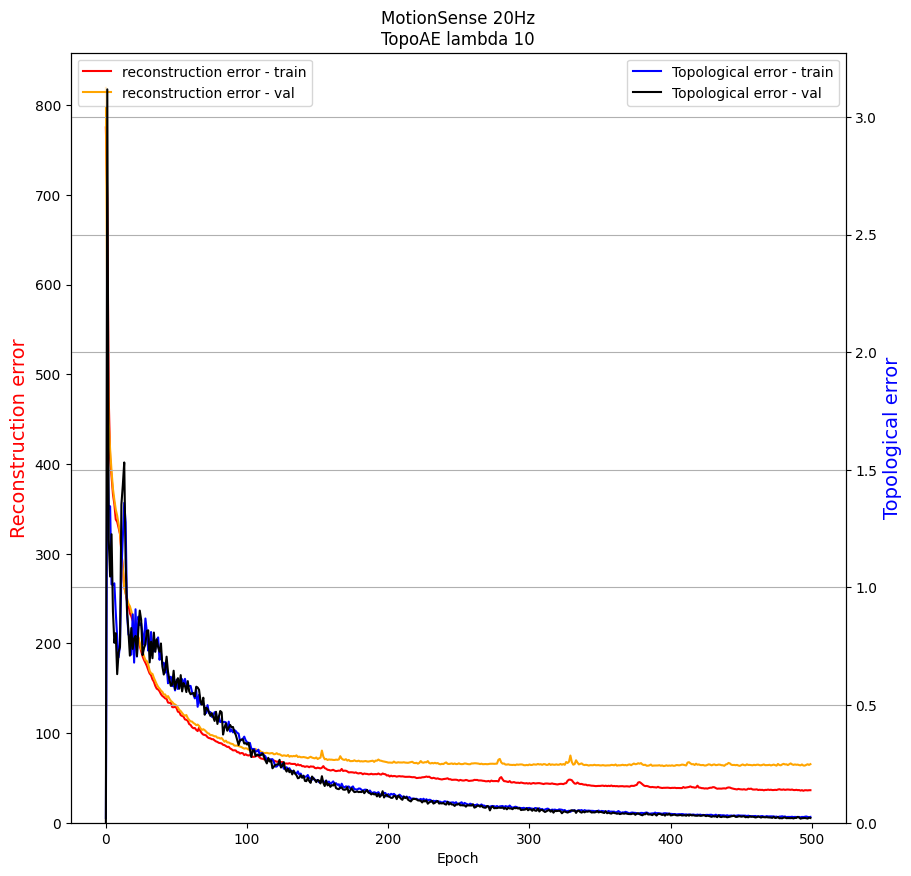

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:815.3717, Loss-ae:812.3951, Loss-topo:0.0298
Epoch:2, P:None, Loss:798.7604, Loss-ae:798.3984, Loss-topo:0.0036
Epoch:3, P:None, Loss:682.6092, Loss-ae:674.6221, Loss-topo:0.0799
Epoch:4, P:None, Loss:461.3497, Loss-ae:452.0597, Loss-topo:0.0929
Epoch:5, P:None, Loss:414.5367, Loss-ae:406.2859, Loss-topo:0.0825
Epoch:6, P:None, Loss:402.7668, Loss-ae:396.1301, Loss-topo:0.0664
Epoch:7, P:None, Loss:382.6287, Loss-ae:375.9884, Loss-topo:0.0664
Epoch:8, P:None, Loss:369.3452, Loss-ae:363.4258, Loss-topo:0.0592
Epoch:9, P:None, Loss:357.4983, Loss-ae:351.9190, Loss-topo:0.0558
Epoch:10, P:None, Loss:351.9674, Loss-ae:346.7257, Loss-topo:0.0524
Epoch:11, P:None, Loss:339.6323, Loss-ae:332.5246, Loss-topo:0.0711
Epoch:12, P:None, Loss:321.8029, Loss-ae:306.2400, Loss-topo:0.1556
Epoch:13, P:None, Loss:300.1546, Loss-ae:287.0917, Loss-topo:0.1306
Epoch:14, P:None, Loss:287.3128, Loss-ae:275.8572, Loss-topo:0.1146
Epoch:15, P:None, Loss:278.5310, Loss-ae:269.0386, Loss-t

KeyboardInterrupt: 

In [18]:
import pickle

# Variables to reuse
save_id = 2
model_name = 'ConvolutionalAutoencoder_custom_dim3'
model_dim = 10
model_epc = 500
model_lams = [0, 0.1, 0.01, 1, 10, 100, 1000]

for model_lam in model_lams:
    # Training model
    topo_reducer = CustomTopoDimRedTransform(
        model_name=model_name,
        model_lambda=model_lam,
        patience=None,
        num_epochs=model_epc,
        from_dim=180,
        to_dim=model_dim
    )

    title_plot = "MotionSense 20Hz\nTopoAE lambda {}".format(model_lam)
    topo_reducer.fit(train_HD, train_Y, title_plot=title_plot)

    # Variables to reuse
    filename = 'data/{}_{}_{}_{}_{}.pkl'.format(model_name, model_lam, model_dim, model_epc, save_id)

    filehandler = open(filename, 'wb')
    pickle.dump(topo_reducer, filehandler)
    filehandler.close()